# 시가총액 데이터셋(marcap) 튜토리얼 - 섹터분석

<img src="https://i.imgur.com/b9t5FAA.png?1" width="60%">

* 한국거래소(KRX)에서 일자별 시가총액 순위 데이터
* 1995-05-02 ~ 2020-12-31 (26년간), 1천만건 이상

#### 2018 - 2021 [FinanceData.KR]()

## 환경 설정 - matplotlib 한글 (구글 Colab)

구글 Colab (혹은 우분투 리눅스)의 경우 별도의 한글 폰트 설치가 필요합니다. matplotlib에서 모든 FFT(True Type Font)를 가져다 사용할 수 있습니다.

여기서는 명령라인에서 폰트를 가져다 설치합니다.

matplotlib 전역 환경을 파라미터들을 설정해 줍니다. 차트 이미지의 크기, 폰트, 라인 속성 등을 지정할 수 있습니다.

한글 폰트 설치

아래 셀을 실행하고, 런타임 재시작 (메뉴의 "런타임 / 런타임 다시 시작...") 후
다시 한번 아래 셀을 실행합니다.

'한글 테스트' 가 표시되면 성공한 것입니다.

'apt-get'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.
'rm'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


Text(0.5, 1.0, '한글 테스트')

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54620 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44544 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 53580 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49828 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 53944 missing from current font.
  font.set_text(s, 0.0, flags=flags)
findfont: Font family ['NanumBarunGothic']

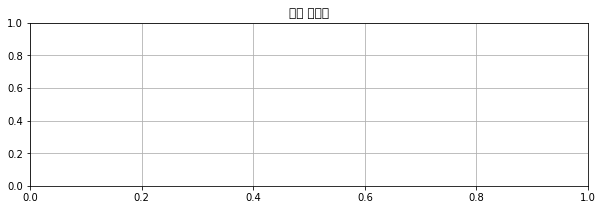

In [1]:
# 한글 폰트 설치와 폰트 캐시 재설정
!apt-get install -y -qq fonts-nanum
!rm -rf ~/.cache/matplotlib/*

# matplotlib 설정
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = 'NanumBarunGothic'
plt.rcParams["axes.grid"] = True
plt.rcParams["figure.figsize"] = (10,3)
plt.rcParams["axes.formatter.useoffset"] = False
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["axes.formatter.limits"] = -10000, 10000

plt.title('한글 테스트')

## 시가총액 데이터셋(marcap) 가져오기
다음과 같이 단 한 줄의 명령으로 데이터를 가져올 수 있습니다.

In [3]:
!git clone "https://github.com/FinanceData/marcap.git" marcap

Cloning into 'marcap'...
Updating files:  64% (24/37)
Updating files:  67% (25/37)
Updating files:  70% (26/37)
Updating files:  72% (27/37)
Updating files:  75% (28/37)
Updating files:  78% (29/37)
Updating files:  81% (30/37)
Updating files:  83% (31/37)
Updating files:  86% (32/37)
Updating files:  89% (33/37)
Updating files:  91% (34/37)
Updating files:  94% (35/37)
Updating files:  97% (36/37)
Updating files: 100% (37/37)
Updating files: 100% (37/37), done.


In [4]:
from marcap import marcap_data

df_marcap = marcap_data('1995-05-02', '2021-01-15')
df_marcap

cannot safely convert passed user dtype of int32 for float64 dtyped data in column 12
cannot safely convert passed user dtype of int32 for float64 dtyped data in column 12
cannot safely convert passed user dtype of int32 for float64 dtyped data in column 12
cannot safely convert passed user dtype of int32 for float64 dtyped data in column 12
cannot safely convert passed user dtype of int32 for float64 dtyped data in column 12
cannot safely convert passed user dtype of int32 for float64 dtyped data in column 12
cannot safely convert passed user dtype of int32 for float64 dtyped data in column 12
cannot safely convert passed user dtype of int32 for float64 dtyped data in column 12
cannot safely convert passed user dtype of int32 for float64 dtyped data in column 12
cannot safely convert passed user dtype of int32 for float64 dtyped data in column 12
cannot safely convert passed user dtype of int32 for float64 dtyped data in column 12
cannot safely convert passed user dtype of int32 for f

ValueError: No objects to concatenate

In [ ]:
len(df_marcap)

## 환경 설정 - 판다스 출력 자리수

숫자가 커서 과학적 표기법(10의 승수로 표현)으로 표시되면 오히려 읽기 좋지 않은 경우가 있습니다.

pandas에서 수치값을 출력할 때 과학적 표기법을 사용하지 않고, 소수점 이하 몇 자리 출력할 것인지를 정해줍니다.

In [ ]:
import pandas as pd
pd.options.display.float_format = '{:.1f}'.format

## 섹터 분석

[FinanceDataReader](https://financedata.github.io/FinanceDataReader/)를 사용하면 전체종목 코드와 섹터 데이터를 손쉽게 가져올 수 있습니다.


[FinanceDataReader](https://financedata.github.io/FinanceDataReader/)는 다음과 같이 설치합니다.

In [ ]:
!pip install -q finance-datareader

다음과 같이 간편하게 전체종목 코드와 섹터 데이터를 가져올 수 있습니다.
전체종목 목록을 "종목마스터"(df_master)라고 부르겠습니다.

In [ ]:
import FinanceDataReader as fdr

df_master = fdr.StockListing('KRX')
df_master.head(10)

In [ ]:
len(df_master)

ETF 혹은 우선주에는 Sector 값이 지정되어 있지 않습니다. 따라서 Sector 가 지정된(즉, NaN이 아닌) 종목만 추출합니다.

In [ ]:
df_master = df_master.dropna(subset=['Sector'])
df_master

## 전체종목과 시가총액 데이터 병합
다음 두 데이터를 종목코드를 기준으로 병합합니다.

* 종목마스터(df_master): 종목코드(Symbol), 섹터(Sector)
* 시가총액 데이터(df_marcap): 종목코드(Code), 종목명(Name), 시가총액(Marcap)


시가총액 데이터(df_marcap)에서 종목코드(Code), 종목명(Name), 시가총액(Marcap) 데이터만 사용하고, 
이후 날짜를 사용하기 위해 인덱스를 풀어(reset_index)줍니다. 

In [ ]:
df_marcap[['Code', 'Name', 'Marcap']].reset_index()

"종목마스터"(df_master)에서 종목코드(Symbol)와 섹터(Sector) 데이터만 활용합니다.

In [ ]:
df_master[['Symbol', 'Sector']]

종목코드를 기준으로 시가총액 데이터(df_marcap)와 종목마스터(df_master)를 병합 합니다. 개별 종목에 Sector를 지정하기 위함입니다. 

In [ ]:
df = pd.merge(df_marcap[['Code', 'Name', 'Marcap']].reset_index(), df_master[['Symbol', 'Sector']], left_on='Code', right_on="Symbol")
df

피벗하여 날짜별(로우), 섹터(컬럼) 시가총액 합계를 구합니다.

In [ ]:
marcap_sector = pd.pivot_table(df, index='Date', columns='Sector', values='Marcap', aggfunc='sum')
marcap_sector

In [ ]:
marcap_sector.columns

In [ ]:
marcap_sector.loc['2021-01-15'] # 특정한 날짜의 섹터별 시가총액

특정한 날짜의 섹터별 시가총액을 소트하여 TOP 10을 구합니다

In [ ]:
pd.DataFrame(marcap_sector.loc['2021-01-15'].sort_values(ascending=False)).head(10)

In [ ]:
cols = pd.DataFrame(marcap_sector.loc['2021-01-15'].sort_values(ascending=False)).head(10).index
cols

In [ ]:
marcap_sector[cols].plot(figsize=(14,8))

펜데믹을 중심으로 2020년 이후 TOP10 섹터를 살펴봅니다.

In [ ]:
marcap_sector.loc['2020':, cols].plot(figsize=(16,8))

'통신 및 방송 장비 제조업' 섹터의 시가총액이 다른 섹터에 비해 압도적으로 크고 또 가파르게 성장하는 것을 확인할 수 있습니다.

## 섹터별 종목수 
TOP 10을 산출합니다.

In [ ]:
marcap_sector_count = pd.pivot_table(df, index='Date', columns='Sector', values='Marcap', aggfunc='count')
marcap_sector_count[cols]

In [ ]:
marcap_sector_count[cols].plot(figsize=(16,8))

In [ ]:
marcap_sector_count.loc['2021-01-15']

In [ ]:
count_top10 = marcap_sector_count.loc['2021-01-15'].sort_values(ascending=False)[:10]
count_top10

특정 날짜(2021-01-15)기준으로 가장 많은 종목은 '특수 목적용 기계 제조업', '소프트웨어 개발 및 공급업', '전자부품 제조업' 순이네요.

섹터별 종목수 TOP 10을 파이차트로 표현해 봅니다. 



In [ ]:
count_top10.plot.pie(figsize=(8, 8))

## 결론
시가총액(marcap) 데이터셋은 26년간 개별 종목의 가격 등 다양한 데이터를 포함하고 있습니다. 

특정 분야의 종목의 시총을 일자별로 합산하면 특정 영역의 혹은 특정 산업의 트렌드를 분석하는데도 요긴하게 사용할 수 있으며, 산업의 규모나 트렌드 분석하는데도 사용할 수 있습니다.

#### 2018 - 2021 [FinanceData.KR]()